# Exercises (2.16 - 2.47)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1BJO1Zz-lLUnRx2RZiec9tAB9VrjB6cdU?usp=sharing)

**2.16**
<ul />

Use the Simplex algorithm to solve the linear programming formulation from Exercise 2.1. What is the percentage utilization of the disk and printer resources at optimality? Comment on how the university community is likely to react to the optimal solution to this problem.

</ul>

**Code Implementation**

In [ ]:
from scipy.optimize import linprog

# Coefficients of the objective function (maximize income)
c = [-3, -1]  # Negative because linprog does minimization

# Coefficients of the inequality constraints
A = [
    [6, 8],  # Disk space constraint
    [3, 2]   # Printer time constraint
]

# Right-hand side of the inequality constraints
b = [48, 60]

# Bounds for the decision variables (number of student and faculty jobs)
x0_bounds = (0, None)
x1_bounds = (0, None)

# Solve the linear programming problem using the Highs solver
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='highs')

# Optimal number of student and faculty jobs
num_student_jobs = res.x[0]
num_faculty_jobs = res.x[1]

# Calculate the percentage utilization of disk and printer resources
disk_utilization = (6 * num_student_jobs + 8 * num_faculty_jobs) / 48 * 100
printer_utilization = (3 * num_student_jobs + 2 * num_faculty_jobs) / 60 * 100

# Print the results
print(f"Optimal number of student jobs: {num_student_jobs}")
print(f"Optimal number of faculty jobs: {num_faculty_jobs}")
print(f"Percentage utilization of disk resources: {disk_utilization}%")
print(f"Percentage utilization of printer resources: {printer_utilization}%")

Optimal number of student jobs: 8.0
Optimal number of faculty jobs: 0.0
Percentage utilization of disk resources: 100.0%
Percentage utilization of printer resources: 40.0%


**2.17**
<ul />

Solve the following problem using the Simplex method:

$$
\begin{align*}
\text{maximize} \quad & z = x_1 + 2x_2 \\
\text{subject to} \quad & x_1 + x_2 \geq 6 \\  
& x_2 \leq 6 \\
& x_1 \leq 8 \\
&  x_1, x_2 \geq 0
\end{align*}
$$

</ul>

**Code Implementation**

In [ ]:
from scipy.optimize import linprog

# Coefficients of the objective function (maximize Z = X1 + 2X2)
c = [-1, -2]  # Negative because linprog does minimization

# Coefficients of the inequality constraints
A = [
    [-1, -1],  # x1 + x2 >= 6 -> -x1 - x2 <= -6
    [0, 1],    # x2 <= 6
    [1, 0]     # x1 <= 8
]

# Right-hand side of the inequality constraints
b = [-6, 6, 8]

# Bounds for the decision variables (X1 and X2)
x0_bounds = (0, None)
x1_bounds = (0, None)

# Solve the linear programming problem using the Highs solver
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='highs')

# Optimal values of X1 and X2
X1 = res.x[0]
X2 = res.x[1]

# Optimal value of Z
Z = X1 + 2 * X2

# Print the results
print(f"Optimal value of X1: {X1}")
print(f"Optimal value of X2: {X2}")
print(f"Optimal value of Z: {Z}")

Optimal value of X1: 8.0
Optimal value of X2: 6.0
Optimal value of Z: 20.0


**2.18**
<ul />

Solve the following problem using the Simplex method:

$$
\begin{align*}
\text{maximize} \quad & z = 4x_1 + 1x_2 \\
\text{subject to} \quad & 3x_1 + x_2 = 3 \\  
& 4x_1 + 3x_2 \geq 6 \\
& x_1 + 2x_2 \leq 3 \\
&  x_1, x_2 \geq 0
\end{align*}
$$

</ul>


**Code Implementation**

In [ ]:
from scipy.optimize import linprog

# Coefficients of the objective function (maximize z = 4x1 + x2)
c = [-4, -1]  # Negative because linprog does minimization

# Coefficients of the inequality constraints
A = [
    [-4, -3],  # 4x1 + 3x2 >= 6 -> -4x1 - 3x2 <= -6
    [1, 2]     # x1 + 2x2 <= 3
]

# Right-hand side of the inequality constraints
b = [-6, 3]

# Coefficients of the equality constraint
A_eq = [
    [3, 1]     # 3x1 + x2 = 3
]

# Right-hand side of the equality constraint
b_eq = [3]

# Bounds for the decision variables (X1 and X2)
x0_bounds = (0, None)
x1_bounds = (0, None)

# Solve the linear programming problem using the Highs solver
res = linprog(c, A_ub=A, b_ub=b, A_eq=A_eq, b_eq=b_eq, bounds=[x0_bounds, x1_bounds], method='highs')

# Optimal values of X1 and X2
X1 = res.x[0]
X2 = res.x[1]

# Optimal value of Z
Z = 4 * X1 + X2

# Print the results
print(f"Optimal value of X1: {X1}")
print(f"Optimal value of X2: {X2}")
print(f"Optimal value of Z: {Z}")

Optimal value of X1: 0.6
Optimal value of X2: 1.2
Optimal value of Z: 3.5999999999999996


**2.19**
<ul />

Apply the Simplex algorithm to each of the following problems. Observe the behavior of the Simplex method and indicate which problems display degeneracy, multiple optima, infeasibility, or an unbounded solution.

<ul />

**a.**

$$
\begin{align*}
\text{maximize} \quad & 3x_1 + x_2 \\
\text{subject to} \quad & x_1 \leq 8 \\  
& 2x_1 - 3x_2 \leq 5 \\
&  x_1, x_2 \geq 0
\end{align*}
$$

**b.**

$$
\begin{align*}
\text{maximize} \quad & 3x_1 + 4x_2 \\
\text{subject to} \quad & x_1 + x_2 \geq 5 \\  
& 2x_1 + 1x_2 \leq 4 \\
& 2x_1 + 1x_2 \leq 4 \\
&  x_1, x_2 \geq 0
\end{align*}
$$

**c.**

$$
\begin{align*}
\text{maximize} \quad & x_1 + 2x_2 \\
\text{subject to} \quad & x_1 + 2x_2 \leq 10 \\  
&  x_1, x_2 \geq 0
\end{align*}
$$

**d.**

$$
\begin{align*}
\text{maximize} \quad & 3x_1 + 9x_2 \\
\text{subject to} \quad & x_1 + 4x_2 \leq 8 \\  
& x_1 + 2x_2 \leq 8 \\
&  x_1, x_2 \geq 0
\end{align*}
$$

</ul>
</ul>


**Code Implementation**

In [ ]:
from scipy.optimize import linprog

# Define a function to solve the linear programming problem
def solve_lp(c, A, b, A_eq=None, b_eq=None):
    # Bounds for the decision variables (X1 and X2)
    x0_bounds = (0, None)
    x1_bounds = (0, None)

    # Solve the linear programming problem using the Highs solver
    res = linprog(c, A_ub=A, b_ub=b, A_eq=A_eq, b_eq=b_eq, bounds=[x0_bounds, x1_bounds], method='highs')

    # Check if the solution is valid
    if res.success:
        # Optimal values of X1 and X2
        X1 = res.x[0]
        X2 = res.x[1]

        # Optimal value of Z
        Z = -res.fun  # Negate because we minimized the negative of the objective function

        return X1, X2, Z
    else:
        return None, None, None

# Problem (a)
c_a = [-3, -1]
A_a = [[1, 0], [2, -3]]
b_a = [8, 5]
X1_a, X2_a, Z_a = solve_lp(c_a, A_a, b_a)

# Problem (b)
c_b = [-3, -4]
A_b = [[-1, -1], [2, 1]]
b_b = [-5, 4]
X1_b, X2_b, Z_b = solve_lp(c_b, A_b, b_b)

# Problem (c)
c_c = [-1, -2]
A_c = [[1, 2]]
b_c = [10]
X1_c, X2_c, Z_c = solve_lp(c_c, A_c, b_c)

# Problem (d)
c_d = [-3, -9]
A_d = [[1, 4], [1, 2]]
b_d = [8, 8]
X1_d, X2_d, Z_d = solve_lp(c_d, A_d, b_d)

# Print the results for all problems
if X1_a is None:
    print("Problem (a): No feasible solution")
else:
    print(f"Problem (a): Optimal value of X1: {X1_a}, Optimal value of X2: {X2_a}, Optimal value of Z: {Z_a}")

if X1_b is None:
    print("Problem (b): No feasible solution")
else:
    print(f"Problem (b): Optimal value of X1: {X1_b}, Optimal value of X2: {X2_b}, Optimal value of Z: {Z_b}")

if X1_c is None:
    print("Problem (c): No feasible solution")
else:
    print(f"Problem (c): Optimal value of X1: {X1_c}, Optimal value of X2: {X2_c}, Optimal value of Z: {Z_c}")

if X1_d is None:
    print("Problem (d): No feasible solution")
else:
    print(f"Problem (d): Optimal value of X1: {X1_d}, Optimal value of X2: {X2_d}, Optimal value of Z: {Z_d}")

Problem (a): No feasible solution
Problem (b): No feasible solution
Problem (c): Optimal value of X1: 10.0, Optimal value of X2: 0.0, Optimal value of Z: 10.0
Problem (d): Optimal value of X1: 8.0, Optimal value of X2: 0.0, Optimal value of Z: 24.0


**2.20**

<ul />

Create a linear programming problem formulation that has unbounded solutions but in which no evidence of unboundedness appears in the initial Simplex tableau.

</ul>


**Code Implementation**

In [ ]:
import numpy as np
from scipy.optimize import linprog

print("Maximize z = x1")
print("Subject to:")
print("  -x1 + x2 <= 1")
print("   x1 - 2x2 <= 2")
print("   x1, x2 >= 0")

# Objective coefficients(for variables x1, x2)
c_linprog = np.array([-1, 0]) 

# Inequality constraints (Ax <= b)
# -x1 + x2 <= 1
#  x1 - 2x2 <= 2
A_ub = np.array([
    [-1, 1],
    [1, -2]
])
b_ub = np.array([1, 2])

# Bounds for x1, x2 (x_i >= 0 is default, but explicit is clear)
x0_bounds = (0, None) # x1 >= 0
x1_bounds = (0, None) # x2 >= 0


# Solve the LP
# Using 'highs' method as it's robust and handles unboundedness well.
# Older scipy versions might default to 'interior-point' or 'simplex' which also detect unboundedness.
result = linprog(c_linprog, A_ub=A_ub, b_ub=b_ub, bounds=[x0_bounds, x1_bounds], method='highs')

print(f"Message: {result.message}") # Solver message, crucial for unboundedness
print(f"Values of x1, x2 at termination: {result.x}") # Values of decision variables

Maximize z = x1
Subject to:
  -x1 + x2 <= 1
   x1 - 2x2 <= 2
   x1, x2 >= 0
Message: The problem is unbounded. (HiGHS Status 10: model_status is Unbounded; primal_status is Feasible)
Values of x1, x2 at termination: None


**2.21**

<ul />

 Perform as many Simplex iterations as possible on the example problem in Section 2.7.2. Observe that the algorithm terminates when there are no ratios $θ_i$ from which to choose a variable to leave the basis.

</ul>

**Code Implementation**

In [ ]:
import numpy as np

class SimplexSolver:
    def __init__(self, c, A_ub, b_ub):
        # Convert inputs to NumPy arrays
        A_ub_np = np.array(A_ub, dtype=float)
        b_ub_np = np.array(b_ub, dtype=float)
        c_np = np.array(c, dtype=float)

        self.num_decision_vars = A_ub_np.shape[1]
        self.num_slack_vars = A_ub_np.shape[0]
        self.num_total_vars = self.num_decision_vars + self.num_slack_vars

        # Create tableau
        self.tableau = np.zeros((1 + self.num_slack_vars, 1 + self.num_total_vars + 1))

        # Objective function row (z - c*x = 0  => z - c1*x1 - c2*x2 ... = 0)
        self.tableau[0, 0] = 1 # z coefficient
        self.tableau[0, 1:self.num_decision_vars+1] = -c_np # -c_j for decision variables

        # Constraint rows
        self.tableau[1:, 1:self.num_decision_vars+1] = A_ub_np
        self.tableau[1:, self.num_decision_vars+1:self.num_total_vars+1] = np.eye(self.num_slack_vars)
        self.tableau[1:, -1] = b_ub_np # RHS

        self.var_names = [f'x{i+1}' for i in range(self.num_decision_vars)] + \
                         [f's{i+1}' for i in range(self.num_slack_vars)]
        
        self.basis_indices = list(range(self.num_decision_vars, self.num_total_vars))
        self.basis_var_names = [self.var_names[i] for i in self.basis_indices]

    def print_tableau(self, iteration):
        print(f"\n--- Iteration {iteration} ---")
        header = ['Basis', 'z'] + self.var_names + ['RHS']
        
        basis_col_width = max(len(name) for name in ['Basis'] + self.basis_var_names)
        
        print(f"{'Basis':<{basis_col_width}} | {'z':>5} | ", end="")
        for name in self.var_names:
            print(f"{name:>7} | ", end="")
        print(f"{'RHS':>7}")
        print("-" * (basis_col_width + 9 + len(self.var_names) * 10 + 7))

        print(f"{'z':<{basis_col_width}} | {self.tableau[0,0]:>5.2f} | ", end="")
        for val in self.tableau[0, 1:-1]:
            print(f"{val:>7.2f} | ", end="")
        print(f"{self.tableau[0, -1]:>7.2f}")

        for i in range(self.num_slack_vars):
            basis_var_name = self.basis_var_names[i]
            print(f"{basis_var_name:<{basis_col_width}} | {self.tableau[i+1,0]:>5.2f} | ", end="")
            for val in self.tableau[i+1, 1:-1]:
                print(f"{val:>7.2f} | ", end="")
            print(f"{self.tableau[i+1, -1]:>7.2f}")
        print("-" * (basis_col_width + 9 + len(self.var_names) * 10 + 7))


    def select_entering_variable_col_idx(self):
        z_row = self.tableau[0, 1:-1] 
        most_negative_val = np.min(z_row)
        if most_negative_val >= -1e-9: # Allow for small positive due to precision
            return -1 
        entering_col_tableau_idx = np.argmin(z_row) + 1 
        return entering_col_tableau_idx

    def select_leaving_variable_row_idx(self, entering_col_idx):
        min_ratio = float('inf')
        leaving_row_tableau_idx = -1 

        constraint_coeffs_entering_var = self.tableau[1:, entering_col_idx]
        rhs_values = self.tableau[1:, -1]

        print("Ratios for leaving variable:")
        all_coeffs_non_positive = True
        found_positive_coeff = False
        for i in range(self.num_slack_vars):
            coeff = constraint_coeffs_entering_var[i]
            rhs = rhs_values[i]
            var_name_in_basis = self.basis_var_names[i]
            if coeff > 1e-9: 
                all_coeffs_non_positive = False
                found_positive_coeff = True
                # Ensure RHS is non-negative for standard ratio test, though it should be.
                # If RHS is 0 and coeff is positive, ratio is 0.
                if rhs < -1e-9 : # If RHS is significantly negative, this row is not a candidate.
                    print(f"  Row {var_name_in_basis}: RHS={rhs:.2f}, Coeff={coeff:.2f}, Ratio=N/A (RHS < 0)")
                    continue
                ratio = rhs / coeff
                print(f"  Row {var_name_in_basis}: RHS={rhs:.2f}, Coeff={coeff:.2f}, Ratio={ratio:.2f}")
                if ratio < min_ratio:
                    min_ratio = ratio
                    leaving_row_tableau_idx = i + 1 
            else:
                print(f"  Row {var_name_in_basis}: RHS={rhs:.2f}, Coeff={coeff:.2f}, Ratio=N/A (coeff <= 0)")
        
        if all_coeffs_non_positive and found_positive_coeff == False : # Corrected logic: if no positive coeffs found at all
            print("All coefficients in entering column are non-positive. Problem is unbounded.")
            return -2 
            
        if leaving_row_tableau_idx == -1 and found_positive_coeff:
            print("No suitable leaving variable found (e.g., all valid ratios might be for negative RHS or issues with Bland's rule for degeneracy not implemented).")
            return -3 
        elif leaving_row_tableau_idx == -1 and not found_positive_coeff: # Should be caught by all_coeffs_non_positive
             print("All coefficients in entering column are non-positive. Problem is unbounded. (Fallback check)")
             return -2

        if leaving_row_tableau_idx != -1:
             print(f"Min ratio is {min_ratio:.2f}, {self.basis_var_names[leaving_row_tableau_idx-1]} leaves.")
        return leaving_row_tableau_idx


    def pivot(self, pivot_row_idx, pivot_col_idx):
        pivot_element = self.tableau[pivot_row_idx, pivot_col_idx]
        if abs(pivot_element) < 1e-9: 
            print(f"Error: Pivot element is too close to zero ({pivot_element}). Halting.")
            return False

        print(f"Pivoting on element at (tableau row {pivot_row_idx}, tableau col {pivot_col_idx}) = {pivot_element:.2f}")
        
        self.tableau[pivot_row_idx, :] /= pivot_element

        for i in range(self.tableau.shape[0]):
            if i != pivot_row_idx:
                factor = self.tableau[i, pivot_col_idx]
                self.tableau[i, :] -= factor * self.tableau[pivot_row_idx, :]
        
        leaving_var_name = self.basis_var_names[pivot_row_idx-1]
        entering_var_name = self.var_names[pivot_col_idx-1]
        self.basis_var_names[pivot_row_idx-1] = entering_var_name
        self.basis_indices[pivot_row_idx-1] = pivot_col_idx-1
        print(f"Variable {entering_var_name} entered basis, {leaving_var_name} left.")
        return True

    def solve(self, max_iterations=10):
        iteration = 0
        self.print_tableau(iteration)

        while iteration < max_iterations:
            iteration += 1
            
            entering_col_idx = self.select_entering_variable_col_idx()
            
            if entering_col_idx == -1:
                print("\nOptimal solution found.")
                self.print_tableau(iteration -1) 
                solution = {name: 0.0 for name in self.var_names}
                obj_value = self.tableau[0, -1]
                for i, basis_var_name in enumerate(self.basis_var_names):
                    # Correctly round values for final solution display
                    val_to_store = self.tableau[i+1, -1]
                    if abs(val_to_store) < 1e-9 : val_to_store = 0.0 # Snap near-zero to zero
                    solution[basis_var_name] = round(val_to_store, 5)

                print(f"Optimal z = {round(obj_value,5):.5f}")
                # Print only variables with non-zero values for clarity
                final_solution_str = ", ".join([f"{k}={v}" for k,v in solution.items() if abs(v)>1e-9 or k in self.basis_var_names])
                print(f"Solution values: {final_solution_str}")
                return "Optimal"

            entering_var_name = self.var_names[entering_col_idx-1]
            print(f"Entering variable: {entering_var_name} (tableau column {entering_col_idx})")

            leaving_row_idx = self.select_leaving_variable_row_idx(entering_col_idx)

            if leaving_row_idx == -2: 
                print("\nProblem is UNBOUNDED.")
                self.print_tableau(iteration -1) 
                return "Unbounded"
            if leaving_row_idx < 1 : 
                print("\nCannot proceed: Error in selecting leaving variable or other issue.")
                self.print_tableau(iteration-1)
                return "Error"
            
            if not self.pivot(leaving_row_idx, entering_col_idx):
                return "Error: Pivot Failed" # Added return if pivot fails
            
            self.print_tableau(iteration)

        print("\nMaximum iterations reached.")
        return "Max Iterations"


# --- Problem Definition from Section 2.7.2 ---
c_obj = [5, 6]      # Objective function coefficients for x1, x2
# Ensure A and b are Python lists as in the user's error context
A_constraints = [[-1, 1],   # Coefficients for constraint 1
                 [0,  1]]   # Coefficients for constraint 2
b_constraints = [2, 10]     # RHS for constraints

# The SimplexSolver class handles conversion to NumPy arrays internally.
solver = SimplexSolver(c_obj, A_constraints, b_constraints)
status = solver.solve()
print(f"\nFinal Status: {status}")


--- Iteration 0 ---
Basis |     z |      x1 |      x2 |      s1 |      s2 |     RHS
-------------------------------------------------------------
z     |  1.00 |   -5.00 |   -6.00 |    0.00 |    0.00 |    0.00
s1    |  0.00 |   -1.00 |    1.00 |    1.00 |    0.00 |    2.00
s2    |  0.00 |    0.00 |    1.00 |    0.00 |    1.00 |   10.00
-------------------------------------------------------------
Entering variable: x2 (tableau column 2)
Ratios for leaving variable:
  Row s1: RHS=2.00, Coeff=1.00, Ratio=2.00
  Row s2: RHS=10.00, Coeff=1.00, Ratio=10.00
Min ratio is 2.00, s1 leaves.
Pivoting on element at (tableau row 1, tableau col 2) = 1.00
Variable x2 entered basis, s1 left.

--- Iteration 1 ---
Basis |     z |      x1 |      x2 |      s1 |      s2 |     RHS
-------------------------------------------------------------
z     |  1.00 |  -11.00 |    0.00 |    6.00 |    0.00 |   12.00
x2    |  0.00 |   -1.00 |    1.00 |    1.00 |    0.00 |    2.00
s2    |  0.00 |    1.00 |    0.00 |   -

**2.22**
<ul />

Solve the following linear programming problem using the Two Phase Simplex method.

$$
\begin{align*}
\text{maximize} \quad & z = 4x_1 + x_2 \\
\text{subject to} \quad & 3x_1 + x_2 = 3 \\  
& 4x_1 + 3x_2 \geq 6 \\
& x_1 + 2x_2 \leq 3 \\
&  x_1, x_2 \geq 0
\end{align*}
$$

</ul>



**Code Implementation**

In [ ]:
import numpy as np
from scipy.optimize import linprog

# Phase 1: Minimize w = a1 (remove artificial variable)
c_phase1 = [0, 0, 0, 0, 1]  # Objective function for phase 1 (w = a1)
A_eq_phase1 = [
    [3, 1, 0, 0, 0],  # 3x1 + x2 = 3
    [4, 3, -1, 0, 1],  # 4x1 + 3x2 - s1 + a1 = 6
    [1, 2, 0, 1, 0]    # x1 + 2x2 + s2 = 3
]
b_eq_phase1 = [3, 6, 3]

# Solve Phase 1
res_phase1 = linprog(c=c_phase1, A_eq=A_eq_phase1, b_eq=b_eq_phase1, method='highs')
if res_phase1.success and np.isclose(res_phase1.fun, 0):
    print("Phase 1 successful: Feasible solution found.")
else:
    print("Phase 1 failed: No feasible solution.")
    exit()

# Phase 2: Maximize original objective function z = 4x1 + x2
c_phase2 = [-4, -1, 0, 0, 0]  # Maximize z (convert to minimization problem)
A_eq_phase2 = A_eq_phase1
b_eq_phase2 = b_eq_phase1

# Solve Phase 2
res_phase2 = linprog(c=c_phase2, A_eq=A_eq_phase2, b_eq=b_eq_phase2, method='highs')
if res_phase2.success:
    print("Optimal solution found:")
    print(f"x1 = {res_phase2.x[0]:.2f}, x2 = {res_phase2.x[1]:.2f}")
    print(f"Maximum z = {-res_phase2.fun:.2f}")
else:
    print("Optimization failed in Phase 2.")

Phase 1 successful: Feasible solution found.
Optimal solution found:
x1 = 1.00, x2 = 0.00
Maximum z = 4.00


**2.23**
<ul />

Examine this linear programming formulation:

$$
\begin{align*}
\text{maximize} \quad & z = x_1 + 2x_2 \\
\text{subject to} \quad & x_1 + 2x_2 \leq 10 \\  
&  x_1, x_2 \geq 0
\end{align*}
$$

Comment on the nature of its solution(s). How does this change if the first constraint is removed from the problem?

</ul>



**Code Implementation**

In [ ]:
from scipy.optimize import linprog

# Define a function to solve the linear programming problem
def solve_lp(c, A, b, bounds):
    # Solve the linear programming problem using the Highs solver
    res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

    # Check if the solution is valid
    if res.success:
        # Optimal values of X1 and X2
        X1 = res.x[0]
        X2 = res.x[1]

        # Optimal value of Z
        Z = -res.fun  # Negate because we minimized the negative of the objective function

        return X1, X2, Z
    else:
        return None, None, None

# Problem with the first constraint
c = [-1, -2]
A = [[1, 2]]
b = [10]
bounds = [(0, None), (0, None)]
X1, X2, Z = solve_lp(c, A, b, bounds)

if X1 is None:
    print("Problem with the first constraint: No feasible solution")
else:
    print(f"Problem with the first constraint: Optimal value of X1: {X1}, Optimal value of X2: {X2}, Optimal value of Z: {Z}")

# Problem without the first constraint
A_no_constraint = None
b_no_constraint = None
X1_no_constraint, X2_no_constraint, Z_no_constraint = solve_lp(c, A_no_constraint, b_no_constraint, bounds)

if X1_no_constraint is None:
    print("Problem without the first constraint: No feasible solution")
else:
    print(f"Problem without the first constraint: Optimal value of X1: {X1_no_constraint}, Optimal value of X2: {X2_no_constraint}, Optimal value of Z: {Z_no_constraint}")

Problem with the first constraint: Optimal value of X1: 10.0, Optimal value of X2: 0.0, Optimal value of Z: 10.0
Problem without the first constraint: No feasible solution


**2.24**
<ul />

Solve the following linear programming problem graphically.

$$
\begin{align*}
\text{maximize} \quad & z = x_1 - x_2 \\
\text{subject to} \quad & x_1 + x_2 \geq 1 \\  
& 3x_2 \geq 9 \\
& 2x_1 + x_2 \leq 4 \\
& 3x_1 \leq 1.5 \\
&  x_1, x_2 \geq 0
\end{align*}
$$

</ul>


**Code Implementation**


Optimal Solution:
Optimal Point: (0.50, 3.00)
Maximum z = -2.50


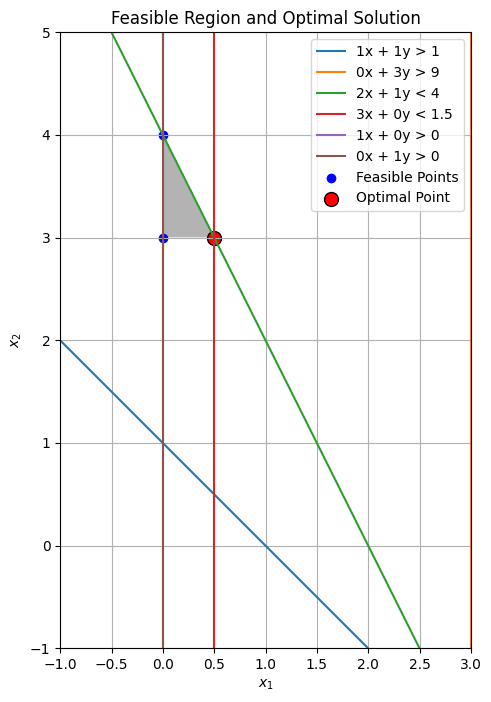

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def find_intersection(line1, line2):
    A = np.array([[line1[0], line1[1]], [line2[0], line2[1]]])
    b = np.array([line1[2], line2[2]])
    if np.linalg.det(A) == 0:
        return None  # Parallel lines, no intersection
    return np.linalg.solve(A, b)

def is_feasible(point, constraints):
    x, y = point
    for a, b, c, sign in constraints:
        if sign == '<' and not (a * x + b * y <= c):
            return False
        if sign == '>' and not (a * x + b * y >= c):
            return False
    return x >= 0 and y >= 0  # Ensure non-negative solutions

def find_feasible_points(constraints):
    feasible_points = []
    for (line1, line2) in combinations(constraints, 2):
        intersection = find_intersection(line1, line2)
        if intersection is not None and is_feasible(intersection, constraints):
            feasible_points.append(intersection)
    return np.array(feasible_points)

def plot_feasible_region(constraints, x_range, y_range):
    x, y = np.meshgrid(x_range, y_range)
    feasible_region = np.ones_like(x, dtype=bool)

    for a, b, c, sign in constraints:
        if sign == '<':
            feasible_region &= (a * x + b * y <= c)
        elif sign == '>':
            feasible_region &= (a * x + b * y >= c)

    plt.imshow(feasible_region.astype(int), extent=(x.min(), x.max(), y.min(), y.max()),
               origin="lower", cmap="Greys", alpha=0.3)

def plot_constraints(constraints, x_range):
    for a, b, c, sign in constraints:
        y_vals = np.linspace(-10, 10, 200)
        if a != 0:
            x_vals = (c - b * y_vals) / a
        else:
            x_vals = np.full_like(y_vals, c / b)
        plt.plot(x_vals, y_vals, label=f'{a}x + {b}y {sign} {c}')

def solve_and_plot():
    constraints = [
        (1, 1, 1, '>'),    # x1 + x2 >= 1
        (0, 3, 9, '>'),    # 3x2 >= 9
        (2, 1, 4, '<'),    # 2x1 + x2 <= 4
        (3, 0, 1.5, '<'),  # 3x1 <= 1.5
        (1, 0, 0, '>'),    # x1 >= 0
        (0, 1, 0, '>')     # x2 >= 0
    ]

    obj_func = lambda x1, x2: x1 - x2  # z = x1 - x2

    x_range = np.linspace(-1, 3, 300)
    y_range = np.linspace(-1, 5, 300)
    plt.figure(figsize=(8, 8))

    plot_feasible_region(constraints, x_range, y_range)
    plot_constraints(constraints, x_range)

    feasible_points = find_feasible_points(constraints)

    if feasible_points.size > 0:
        feasible_x, feasible_y = zip(*feasible_points)
        plt.scatter(feasible_x, feasible_y, color='blue', label='Feasible Points')

        # Compute objective function values at extreme points
        obj_values = [obj_func(x1, x2) for x1, x2 in feasible_points]

        # Display best extreme point
        best_idx = np.argmax(obj_values)
        optimal_point = feasible_points[best_idx]
        plt.scatter(*optimal_point, color='red', s=100, label='Optimal Point', edgecolors='black')

        print("\nOptimal Solution:")
        print(f"Optimal Point: ({optimal_point[0]:.2f}, {optimal_point[1]:.2f})")
        print(f"Maximum z = {obj_values[best_idx]:.2f}")

    plt.xlim(-1, 3)
    plt.ylim(-1, 5)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper right')
    plt.title("Feasible Region and Optimal Solution")
    plt.grid(True)
    plt.show()

solve_and_plot()


**2.25**
<ul />

 What determines the number of basic variables in a linear programming problem solution?


**Solution:**

The number of basic variables in a linear programming problem solution is determined by the number of constraints in the system. Specifically, in a system with \( m \) constraints and \( n \) decision variables, a basic feasible solution will have exactly \( m \) basic variables and \( n-m \) non-basic variables.

</ul>




**2.26**
<ul />

What is the value of a non-basic variable in a feasible solution of a linear programming problem?

**Solution:**

In a feasible solution of a linear programming problem, a non-basic variable is assigned a value of zero. This allows the remaining basic variables to be solved uniquely from the system of equations.

</ul>


**2.27**
<ul />

 In an optimal Simplex tableau, what is the economic interpretation of the objective function row entry corresponding to the i-th slack variable?

**Solution:**

In an optimal Simplex tableau, the entry in the objective function row corresponding to the i-th slack variable represents the shadow price of the associated constraint. This value indicates how much the objective function will change per unit increase in the right-hand side of that constraint.

</ul>


**2.28**
<ul />

In a Simplex tableau, what is the interpretation of the entries in the right-hand-side column?

**Solution:**

The entries in the right-hand-side column of a Simplex tableau represent the values of the basic variables at the current iteration. These values indicate the current feasible solution for the linear programming problem.

</ul>

**2.29**
<ul />

What is the consequence of a tie for the entering basic variable?

**Solution:**

If there is a tie for the entering basic variable, any of the tied variables can be chosen as the entering variable. This may lead to different pivot sequences, and in some cases, may affect the number of iterations required to reach the optimal solution.

</ul>

**2.30**
<ul />

What if there is a tie for the leaving basic variable?

**Solution:**

If there is a tie for the leaving basic variable, the problem exhibits degeneracy. This can result in cycling, where the Simplex method revisits the same solution repeatedly without progress. Anti-cycling rules, such as Bland’s Rule, can be used to prevent this issue.

</ul>

**2.31**
<ul />

What if, in the objective function row of a final tableau, there is a zero in a column corresponding to a non-basic variable?

**Solution:**

If there is a zero in the objective function row for a non-basic variable in the final tableau, this indicates the presence of multiple optimal solutions. Any increase in the corresponding variable will not change the optimal objective value, allowing for an alternative optimal solution.

</ul>

**2.32**
<ul />

What happens in the Simplex algorithm if you choose, as the entering variable,a variable with a negative objective row coefficient but not the most negative coefficient?

**Solution:**

If a variable with a negative objective row coefficient is chosen as the entering variable but it is not the most negative, the algorithm may still reach the optimal solution but may take more iterations. The standard approach is to choose the most negative coefficient to ensure the fastest path to optimization.

</ul>

**2.33**
<ul />

Solve the following problem using the Simplex method:

$$
\begin{align*}
\text{maximize} \quad & z = x_1 + 9x_2 + x_3 \\
\text{subject to} \quad & x_1 + 2x_2 + 3x_3 \leq 9 \\  
& 3x_1 + 2x_2 + 2x_3 \leq 15 \\
& x_1, x_2, x_3 \geq 0 
\end{align*}
$$

</ul>


**Code Implementation**

In [ ]:
from scipy.optimize import linprog

# Coefficients of the objective function (we negate the values for maximization)
c = [-1, -9, -1]  # Maximizing z = x1 + 9x2 + x3

# Coefficients of the constraints
A = [
    [1, 2, 3],  # x1 + 2x2 + 3x3 <= 9
    [3, 2, 2]   # 3x1 + 2x2 + 2x3 <= 15
]

# Right-hand side of the constraints
b = [9, 15]

# Bounds for the variables (x1, x2, x3 >= 0)
x_bounds = (0, None)
x2_bounds = (0, None)
x3_bounds = (0, None)

# Use linprog to solve the problem (Simplex method)
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, x2_bounds, x3_bounds], method='highs')

# Display the results
if result.success:
    x1_opt = result.x[0]
    x2_opt = result.x[1]
    x3_opt = result.x[2]
    max_z = -result.fun  # Negate the result to get the maximized value

    print(f"Optimal value of x1: {x1_opt:.2f}")
    print(f"Optimal value of x2: {x2_opt:.2f}")
    print(f"Optimal value of x3: {x3_opt:.2f}")
    print(f"Maximum value of z: {max_z:.2f}")
else:
    print("Optimization failed.")

Optimal value of x1: 0.00
Optimal value of x2: 4.50
Optimal value of x3: 0.00
Maximum value of z: 40.50


**2.34**
<ul />

Use the Two Phase Simplex method to solve the following problem:

$$
\begin{align*}
\text{minimize} \quad & z = 16x_1 + 2x_2 - 3x_3 \\
\text{subject to} \quad & x_1 - 6x_2 \geq 4 \\  
& 3x_2 + 7x_3 \leq -5 \\
& x_1 + x_2 + x_3 = 10 \\
& x_1, x_2, x_3 \geq 0 
\end{align*}
$$

</ul>

**Code Implementation**

In [2]:
import numpy as np
from scipy.optimize import linprog

print("LP Formulation:")
print("Minimize z = 16x1 + 2x2 - 3x3")
print("Subject to:")
print("   x1 - 6x2 >= 4")
print("   3x2 + 7x3 <= -5")
print("   x1 + x2 + x3 = 10")
print("   x1, x2, x3 >= 0")

# --- Setup for scipy.optimize ---

# 1. Objective function (already a minimization problem)
# Coefficients for x1, x2, x3:
c_obj = np.array([16, 2, -3])

# 2. Inequality constraints (A_ub @ x <= b_ub)
# The first constraint x1 - 6x2 >= 4 must be converted to '<=' form by multiplying by -1.
# -x1 + 6x2 <= -4
# The second constraint 3x2 + 7x3 <= -5 is already in the correct form.
A_ub = np.array([
    [-1,  6,  0],
    [ 0,  3,  7]
])
b_ub = np.array([-4, -5])

# 3. Equality constraints (A_eq @ x == b_eq)
# x1 + x2 + x3 = 10
A_eq = np.array([
    [1, 1, 1]
])
b_eq = np.array([10])

# 4. Bounds for variables (x_i >= 0)
x_bounds = [(0, None), (0, None), (0, None)] # (x1_min, x1_max), (x2_min, x2_max), ...

# Solve the LP using the 'highs' method, which is robust for these types of problems.
result = linprog(c_obj, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds, method='highs')

# --- Cleaned Up Output and Interpretation ---
print(f"\nSolver Message: {result.message}")

# Interpretation based on the solver's output for an infeasible problem
if not result.success and "infeasible" in result.message.lower():
    print("Conclusion: The LP problem is INFEASIBLE, as verified by the solver.")
    print("             This means no solution exists that satisfies all the constraints.")
else:
    print("Conclusion: The solver did not report infeasibility as expected.")
    print(f"  Solver Status Code: {result.status}")
    print(f"  Success Flag: {result.success}")

LP Formulation:
Minimize z = 16x1 + 2x2 - 3x3
Subject to:
   x1 - 6x2 >= 4
   3x2 + 7x3 <= -5
   x1 + x2 + x3 = 10
   x1, x2, x3 >= 0

Solver Message: The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is None)
Conclusion: The LP problem is INFEASIBLE, as verified by the solver.
             This means no solution exists that satisfies all the constraints.


**2.35**
<ul />

business executive has the option of investing money in two plans. Plan A guarantees that each dollar invested will earn 70 cents a year hence, and plan B guarantees that each dollar invested will earn \$2 two years hence. Plan A allows yearly investments, while in plan B, only investments for periods that are multiples of two years are allowed. How should the executive invest \$100,000 to maximize the earnings at the end of three years? Formulate this problem as a linear programming problem.

</ul>

**Code Implementation**

In [ ]:
from scipy.optimize import linprog

# Coefficients for the objective function (maximize Z = 2.1x1 + 2x2)
c = [-2.1, -2]  # We multiply by -1 because linprog minimizes the objective function

# Coefficients for the constraints (x1 + x2 = 100000)
A_eq = [[1, 1]]  # x1 + x2 = 100000
b_eq = [100000]

# Bounds for x1 and x2 (both must be >= 0)
x_bounds = (0, None)
x2_bounds = (0, None)

# Use linprog to solve the problem
result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=[x_bounds, x2_bounds], method='highs')

# Display the results
if result.success:
    x1_opt = result.x[0]
    x2_opt = result.x[1]
    max_earnings = -result.fun  # We negate the result because we minimized it

    print(f"Optimal amount to invest in Plan A (x1): ${x1_opt:.2f}")
    print(f"Optimal amount to invest in Plan B (x2): ${x2_opt:.2f}")
    print(f"Maximum earnings at the end of 3 years: ${max_earnings:.2f}")
else:
    print("Optimization failed.")

Optimal amount to invest in Plan A (x1): $100000.00
Optimal amount to invest in Plan B (x2): $0.00
Maximum earnings at the end of 3 years: $210000.00


**2.36**
<ul />

An investment portfolio management firm wishes to develop a mathematical model to help decide how to invest \$1 million for one year. Municipal bonds are to be bought in combinations that balance risk and profit. Three types of bonds are being considered: 
<ul />

• AAA rated bonds yielding 6% annually and which must be purchased in units of \$5000.<br>
• A rated bonds yielding 8% annually and which must be purchased in units of \$1000.<br>
• J rated (junk) bonds yielding 10% annually and which must be purchased in units of \$10,000.<br>

</ul>

The Board of Directors has specified that no more than 25% of the portfolio should be invested in (risky) junk bonds, and at least 40% should be invested in AAA rated bonds. Bonds are to be purchased with the objective of maximizing earnings at the end of the year. It may be assumed that the stated yield dividend is paid at the end of the year, and that no other distributions are made during the year. Formulate this problem as a linear programming problem

</ul>

**Code Implementation**

In [ ]:
from scipy.optimize import linprog

# Coefficients of the objective function (note the negative signs for maximization)
c = [-300, -80, -1000]

# Coefficients of the inequality constraints
A = [
    [5000, 1000, 10000],  # 5000x1 + 1000x2 + 10000x3 <= 1,000,000
    [0, 0, 1],            # x3 <= 25
    [-1, 0, 0]            # -x1 <= -80 (x1 >= 80)
]

# Right-hand side of the inequality constraints
b = [1000000, 25, -80]

# Bounds for each variable
x1_bounds = (0, None)
x2_bounds = (0, None)
x3_bounds = (0, None)
bounds = [x1_bounds, x2_bounds, x3_bounds]

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Print the result
if result.success:
    print(f"Optimal value (Z): {-result.fun}")
    print(f"Optimal solution (x1, x2, x3): {result.x}")
else:
    print("No solution found.")

Optimal value (Z): 77000.0
Optimal solution (x1, x2, x3): [ 80. 350.  25.]


**2.37**
<ul />

A philanthropist wishes to develop a mathematical model to help him decide how to donate his spare cash to several worthy causes. He has \$10 million to distribute among the recipients, and he would like to donate in units of thousands of dollars. <br>
Three organizations would like to receive funds: Our Great State University, the Friends of the Grand Opera, and the Save the Humuhumunukunukuapua‘a Society. The philanthropist wants to give at most 50% of his cash to any one organization. The desirability of the philanthropist’s giving to any particular recipient is to be measured in terms of the number of tax credits he will receive. The value of giving to an educational institution is rated at 10 credits for every \$1000 donation, while the value of \$1000 donation to the music lovers is rated at 8 credits, and each \$1000 donation to the wildlife conservation is rated at 6 credits. Write a linear programming model to help this philanthropist maximize the number of tax credits that can be achieved by contributing among these three groups.

</ul>

**Code Implementation**

In [ ]:
from scipy.optimize import linprog

# Coefficients of the objective function (note the negative signs for maximization)
c = [-10, -8, -6]

# Coefficients of the inequality constraints
A = [
    [1, 1, 1],      # x1 + x2 + x3 <= 10,000
    [1, 0, 0],      # x1 <= 5,000
    [0, 1, 0],      # x2 <= 5,000
    [0, 0, 1]       # x3 <= 5,000
]

# Right-hand side of the inequality constraints
b = [10000, 5000, 5000, 5000]

# Bounds for each variable
x1_bounds = (0, None)
x2_bounds = (0, None)
x3_bounds = (0, None)
bounds = [x1_bounds, x2_bounds, x3_bounds]

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Print the result
if result.success:
    print(f"Optimal value (Z): {-result.fun}")
    print(f"Optimal solution (x1, x2, x3): {result.x}")
else:
    print("No solution found.")

Optimal value (Z): 90000.0
Optimal solution (x1, x2, x3): [5000. 5000.   -0.]


**2.38**
<ul />

Solve the following problem graphically:

$$
\begin{align*}
\text{maximize} \quad & z = -2x_1 + x_2 \\
\text{subject to} \quad & x_1 - x_2 \leq 5 \\  
& x_1 \leq 7 \\
& x_2 \leq 6 \\
& x_1 - x_2 \leq -4 \\
& x_1, x_2 \geq 0
\end{align*}
$$

</ul>

**Code Implementation**


Optimal Solution:
Optimal Point: (0.00, 4.00)
Maximum z = 4.00


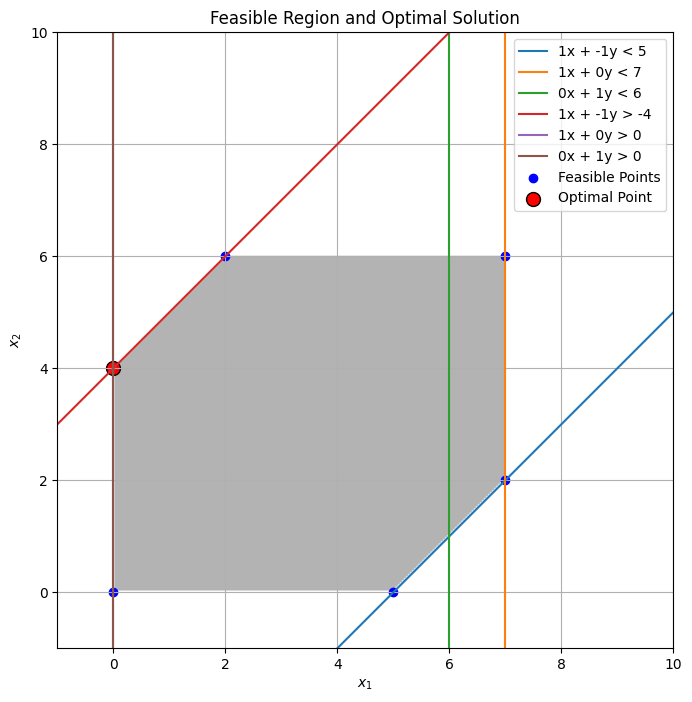

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def find_intersection(line1, line2):
    A = np.array([[line1[0], line1[1]], [line2[0], line2[1]]])
    b = np.array([line1[2], line2[2]])
    if np.linalg.det(A) == 0:
        return None  # Parallel lines, no intersection
    return np.linalg.solve(A, b)

def is_feasible(point, constraints):
    x, y = point
    for a, b, c, sign in constraints:
        if sign == '<' and not (a * x + b * y <= c):
            return False
        if sign == '>' and not (a * x + b * y >= c):
            return False
    return x >= 0 and y >= 0  # Ensure non-negative solutions

def find_feasible_points(constraints):
    feasible_points = []
    for (line1, line2) in combinations(constraints, 2):
        intersection = find_intersection(line1, line2)
        if intersection is not None and is_feasible(intersection, constraints):
            feasible_points.append(intersection)
    return np.array(feasible_points)

def plot_feasible_region(constraints, x_range, y_range):
    x, y = np.meshgrid(x_range, y_range)
    feasible_region = np.ones_like(x, dtype=bool)

    for a, b, c, sign in constraints:
        if sign == '<':
            feasible_region &= (a * x + b * y <= c)
        elif sign == '>':
            feasible_region &= (a * x + b * y >= c)

    plt.imshow(feasible_region.astype(int), extent=(x.min(), x.max(), y.min(), y.max()),
               origin="lower", cmap="Greys", alpha=0.3)

def plot_constraints(constraints, x_range):
    for a, b, c, sign in constraints:
        y_vals = np.linspace(-10, 10, 200)
        if a != 0:
            x_vals = (c - b * y_vals) / a
        else:
            x_vals = np.full_like(y_vals, c / b)
        plt.plot(x_vals, y_vals, label=f'{a}x + {b}y {sign} {c}')

def solve_and_plot():
    constraints = [
        (1, -1, 5, '<'),    # x1 - x2 <= 5
        (1, 0, 7, '<'),   # x1 <= 7
        (0, 1, 6, '<'),   # x2 <= 6
        (1, -1, -4, '>'),   # x1 - x2 >= -4
        (1, 0, 0, '>'),    # x1 >= 0
        (0, 1, 0, '>')     # x2 >= 0
    ]

    obj_func = lambda x1, x2: -2*x1 + x2  # z = -2x1 + x2

    x_range = np.linspace(-1, 10, 300)
    y_range = np.linspace(-1, 10, 300)
    plt.figure(figsize=(8, 8))

    plot_feasible_region(constraints, x_range, y_range)
    plot_constraints(constraints, x_range)

    feasible_points = find_feasible_points(constraints)

    if feasible_points.size > 0:
        feasible_x, feasible_y = zip(*feasible_points)
        plt.scatter(feasible_x, feasible_y, color='blue', label='Feasible Points')

        # Compute objective function values at extreme points
        obj_values = [obj_func(x1, x2) for x1, x2 in feasible_points]

        # Display best extreme point
        best_idx = np.argmax(obj_values)
        optimal_point = feasible_points[best_idx]
        plt.scatter(*optimal_point, color='red', s=100, label='Optimal Point', edgecolors='black')

        print("\nOptimal Solution:")
        print(f"Optimal Point: ({optimal_point[0]:.2f}, {optimal_point[1]:.2f})")
        print(f"Maximum z = {obj_values[best_idx]:.2f}")

    plt.xlim(-1, 10)
    plt.ylim(-1, 10)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper right')
    plt.title("Feasible Region and Optimal Solution")
    plt.grid(True)
    plt.show()

solve_and_plot()

**2.39**
<ul />

Write the dual of the primal linear programming problem in Exercise 2.7.

</ul>


**Code Implementation**

In [3]:
import numpy as np
import copy

def get_dual_lp(primal_problem):
    """
    Generates the dual of a given primal linear programming problem.
    Assumes a maximization primal and non-negative variables.

    Args:
        primal_problem (dict): A dictionary representing the primal LP.
            Keys: 'type' ('maximize'), 'c' (objective coeffs), 
                  'constraints' (list of constraint dicts).

    Returns:
        dict: A dictionary representing the dual LP.
    """
    if primal_problem.get('type', 'maximize').lower() != 'maximize':
        raise ValueError("This function assumes a maximization primal problem.")

    # --- Step 1: Convert primal to canonical form (all constraints <=) ---
    canonical_primal = copy.deepcopy(primal_problem)
    for constr in canonical_primal['constraints']:
        if constr['type'] == '>=':
            constr['coeffs'] = [-x for x in constr['coeffs']]
            constr['rhs'] = -constr['rhs']
            constr['type'] = '<='
        elif constr['type'] == '=':
            # This would require splitting into two constraints, but not needed for this problem.
            raise NotImplementedError("Equality constraints are not handled in this simplified script.")
    
    # --- Step 2: Extract A, b, c from the canonical primal ---
    # Objective coefficients of primal become RHS of dual
    dual_b = np.array(canonical_primal['c'], dtype=float)
    
    # RHS of primal constraints become objective coefficients of dual
    dual_c = np.array([c['rhs'] for c in canonical_primal['constraints']], dtype=float)

    # Constraint matrix of primal is transposed for dual
    primal_A = np.array([c['coeffs'] for c in canonical_primal['constraints']], dtype=float)
    dual_A = primal_A.T

    # --- Step 3: Assemble the dual problem ---
    num_dual_vars = len(dual_c)
    num_dual_constraints = len(dual_b)

    dual_problem = {
        'type': 'minimize',
        'c': list(dual_c),
        'var_names': [f'y{i+1}' for i in range(num_dual_vars)],
        'constraints': []
    }

    for i in range(num_dual_constraints):
        dual_problem['constraints'].append({
            'coeffs': list(dual_A[i]),
            'type': '>=', # Dual of max-primal with non-negative vars has >= constraints
            'rhs': dual_b[i]
        })

    return dual_problem

def print_lp(problem, title="Linear Programming Problem"):
    """Neatly prints an LP problem defined in a dictionary."""
    print(f"--- {title} ---")
    
    var_names = problem.get('var_names', [f'x{i+1}' for i in range(len(problem['c']))])
    
    # Print Objective
    obj_terms = []
    for i, coeff in enumerate(problem['c']):
        if abs(coeff) > 1e-9: # Only show non-zero terms
            sign = "-" if coeff < 0 else "+"
            abs_coeff = abs(coeff)
            # Hide coefficient if it's 1, unless it's the first term
            coeff_str = "" if abs_coeff == 1 else f"{abs_coeff} "
            
            if not obj_terms: # First term
                 term_str = f"{'-' if sign == '-' else ''}{coeff_str}{var_names[i]}"
            else:
                 term_str = f" {sign} {coeff_str}{var_names[i]}"
            obj_terms.append(term_str)
    
    print(f"{problem['type'].capitalize()} w = " + "".join(obj_terms))

    # Print Constraints
    print("Subject to:")
    for constr in problem['constraints']:
        constr_terms = []
        for i, coeff in enumerate(constr['coeffs']):
            if abs(coeff) > 1e-9: # Only show non-zero terms
                sign = "-" if coeff < 0 else "+"
                abs_coeff = abs(coeff)
                coeff_str = "" if abs_coeff == 1 else f"{abs_coeff} "

                if not constr_terms:
                    term_str = f"{'-' if sign == '-' else ''}{coeff_str}{var_names[i]}"
                else:
                    term_str = f" {sign} {coeff_str}{var_names[i]}"
                constr_terms.append(term_str)
        
        print(f"  {''.join(constr_terms)} {constr['type']} {constr['rhs']}")
    
    # Print variable constraints
    print(f"  {', '.join(var_names)} >= 0")


# --- Define the Primal Problem from Exercise 2.7 ---
# Maximize z = x1 - x2
# Subject to:
#   x1 + x2 >= 1
#   3x2 <= 9
#   2x1 + x2 <= 4
#   x1 <= 3/2  (or 1.5)

primal_problem_ex2_7 = {
    'type': 'maximize',
    'c': [1, -1],
    'var_names': ['x1', 'x2'],
    'constraints': [
        {'coeffs': [1, 1], 'type': '>=', 'rhs': 1},
        {'coeffs': [0, 3], 'type': '<=', 'rhs': 9},
        {'coeffs': [2, 1], 'type': '<=', 'rhs': 4},
        {'coeffs': [1, 0], 'type': '<=', 'rhs': 1.5},
    ]
}

# --- Generate and Print the Dual ---
dual_problem_ex2_7 = get_dual_lp(primal_problem_ex2_7)

print_lp(primal_problem_ex2_7, title="Primal Problem (Exercise 2.7)")
print("\n")
print_lp(dual_problem_ex2_7, title="Dual Problem")

--- Primal Problem (Exercise 2.7) ---
Maximize w = x1 - x2
Subject to:
  x1 + x2 >= 1
  3 x2 <= 9
  2 x1 + x2 <= 4
  x1 <= 1.5
  x1, x2 >= 0


--- Dual Problem ---
Minimize w = -y1 + 9.0 y2 + 4.0 y3 + 1.5 y4
Subject to:
  -y1 + 2.0 y3 + y4 >= 1.0
  -y1 + 3.0 y2 + y3 >= -1.0
  y1, y2, y3, y4 >= 0


**2.40**
<ul />

Write the dual of the primal problem in Exercise 2.8. Solve the dual problem, and identify the shadow prices.

</ul>

**Code Implementation**

In [4]:
import numpy as np
from scipy.optimize import linprog
import copy

def get_dual_lp(primal_problem):
    """
    Generates the dual of a given primal linear programming problem.
    Assumes a maximization primal and non-negative variables.
    """
    if primal_problem.get('type', 'maximize').lower() != 'maximize':
        raise ValueError("This function assumes a maximization primal problem.")

    canonical_primal = copy.deepcopy(primal_problem)
    for constr in canonical_primal['constraints']:
        if constr['type'] == '>=':
            constr['coeffs'] = [-x for x in constr['coeffs']]
            constr['rhs'] = -constr['rhs']
            constr['type'] = '<='
    
    dual_b = np.array(canonical_primal['c'], dtype=float)
    dual_c = np.array([c['rhs'] for c in canonical_primal['constraints']], dtype=float)
    primal_A = np.array([c['coeffs'] for c in canonical_primal['constraints']], dtype=float)
    dual_A = primal_A.T

    num_dual_vars = len(dual_c)
    dual_problem = {
        'type': 'minimize',
        'c': list(dual_c),
        'var_names': [f'y{i+1}' for i in range(num_dual_vars)],
        'constraints': []
    }
    for i in range(len(dual_b)):
        dual_problem['constraints'].append({
            'coeffs': list(dual_A[i]),
            'type': '>=',
            'rhs': dual_b[i]
        })
    return dual_problem

def print_lp(problem, title="Linear Programming Problem"):
    """Neatly prints an LP problem defined in a dictionary."""
    print(f"--- {title} ---")
    var_names = problem.get('var_names', [f'x{i+1}' for i in range(len(problem['c']))])
    
    obj_terms = []
    for i, coeff in enumerate(problem['c']):
        if abs(coeff) > 1e-9:
            sign = "-" if coeff < 0 else "+"
            abs_coeff = abs(coeff)
            coeff_str = "" if abs_coeff == 1 else f"{abs_coeff} "
            if not obj_terms:
                 term_str = f"{'-' if sign == '-' else ''}{coeff_str}{var_names[i]}"
            else:
                 term_str = f" {sign} {coeff_str}{var_names[i]}"
            obj_terms.append(term_str)
    
    print(f"{problem['type'].capitalize()} w = " + "".join(obj_terms))
    print("Subject to:")
    for constr in problem['constraints']:
        constr_terms = []
        for i, coeff in enumerate(constr['coeffs']):
            if abs(coeff) > 1e-9:
                sign = "-" if coeff < 0 else "+"
                abs_coeff = abs(coeff)
                coeff_str = "" if abs_coeff == 1 else f"{abs_coeff} "
                if not constr_terms:
                    term_str = f"{'-' if sign == '-' else ''}{coeff_str}{var_names[i]}"
                else:
                    term_str = f" {sign} {coeff_str}{var_names[i]}"
                constr_terms.append(term_str)
        print(f"  {''.join(constr_terms)} {constr['type']} {constr['rhs']}")
    print(f"  {', '.join(var_names)} >= 0")

# --- Define the Primal Problem from Exercise 2.8 ---
primal_ex2_8 = {
    'type': 'maximize',
    'c': [-2, 1],
    'var_names': ['x1', 'x2'],
    'constraints': [
        {'coeffs': [1, -1], 'type': '<=', 'rhs': 5},
        {'coeffs': [1,  0], 'type': '<=', 'rhs': 7},
        {'coeffs': [0,  1], 'type': '<=', 'rhs': 6},
        {'coeffs': [1, -1], 'type': '>=', 'rhs': -4},
    ]
}

# --- 1. Write the Dual ---
dual_problem = get_dual_lp(primal_ex2_8)
print_lp(primal_ex2_8, title="Primal Problem (Exercise 2.8)")
print("\n")
print_lp(dual_problem, title="Generated Dual Problem")

# --- 2. Solve the Dual Problem using linprog ---
# The dual objective is 'minimize', which is linprog's default.
c_dual = np.array(dual_problem['c'])

# linprog requires constraints in '<=' form, so we multiply the dual's '>=' constraints by -1.
A_dual_gte = np.array([c['coeffs'] for c in dual_problem['constraints']])
b_dual_gte = np.array([c['rhs'] for c in dual_problem['constraints']])

A_dual_ub = -A_dual_gte
b_dual_ub = -b_dual_gte

# All dual variables y_i >= 0
y_bounds = [(0, None) for _ in dual_problem['var_names']]

print("\n--- Solving the Dual Problem ---")
result_dual = linprog(c_dual, A_ub=A_dual_ub, b_ub=b_dual_ub, bounds=y_bounds, method='highs')

if result_dual.success:
    print(f"Optimal Value (w) = {result_dual.fun:.4f}")
    print("Optimal Values for Dual Variables (y):")
    for i, y_val in enumerate(result_dual.x):
        print(f"  {dual_problem['var_names'][i]} = {y_val:.4f}")
else:
    print("The dual problem could not be solved successfully.")
    print(f"Message: {result_dual.message}")

# --- 3. Identify the Shadow Prices ---
print("\n--- Shadow Prices for the Primal Problem ---")
if result_dual.success:
    print("The shadow prices are the optimal values of the dual variables.")
    # Map dual variables back to the original primal constraints
    original_constraints = [
        "x1 - x2 <= 5 ",
        "x1 <= 7      ",
        "x2 <= 6      ",
        "x1 - x2 >= -4"
    ]
    for i, price in enumerate(result_dual.x):
        print(f"  Constraint {i+1} ({original_constraints[i]}): Shadow Price = {price:.4f}")
else:
    print("Shadow prices cannot be determined as the dual problem did not yield an optimal solution.")

# --- (Optional) Verification by solving the primal ---
print("\n--- Verification: Solving the Primal Problem ---")
c_primal = [-c for c in primal_ex2_8['c']] # Negate for linprog minimization
A_primal_ub_list = []
b_primal_ub_list = []
for constr in primal_ex2_8['constraints']:
    if constr['type'] == '<=':
        A_primal_ub_list.append(constr['coeffs'])
        b_primal_ub_list.append(constr['rhs'])
    elif constr['type'] == '>=': # Convert >= to <=
        A_primal_ub_list.append([-c for c in constr['coeffs']])
        b_primal_ub_list.append(-constr['rhs'])
result_primal = linprog(c_primal, A_ub=A_primal_ub_list, b_ub=b_primal_ub_list, bounds=[(0,None), (0,None)], method='highs')

if result_primal.success:
    max_z = -result_primal.fun # We negated the objective, so negate back
    print(f"Primal Optimal Value (z) = {max_z:.4f}")
    print(f"Dual Optimal Value   (w) = {result_dual.fun:.4f}")
    if np.isclose(max_z, result_dual.fun):
        print("Verification successful: Max z = Min w.")

--- Primal Problem (Exercise 2.8) ---
Maximize w = -2 x1 + x2
Subject to:
  x1 - x2 <= 5
  x1 <= 7
  x2 <= 6
  x1 - x2 >= -4
  x1, x2 >= 0


--- Generated Dual Problem ---
Minimize w = 5.0 y1 + 7.0 y2 + 6.0 y3 + 4.0 y4
Subject to:
  y1 + y2 - y4 >= -2.0
  -y1 + y3 + y4 >= 1.0
  y1, y2, y3, y4 >= 0

--- Solving the Dual Problem ---
Optimal Value (w) = 4.0000
Optimal Values for Dual Variables (y):
  y1 = 0.0000
  y2 = 0.0000
  y3 = 0.0000
  y4 = 1.0000

--- Shadow Prices for the Primal Problem ---
The shadow prices are the optimal values of the dual variables.
  Constraint 1 (x1 - x2 <= 5 ): Shadow Price = 0.0000
  Constraint 2 (x1 <= 7      ): Shadow Price = 0.0000
  Constraint 3 (x2 <= 6      ): Shadow Price = 0.0000
  Constraint 4 (x1 - x2 >= -4): Shadow Price = 1.0000

--- Verification: Solving the Primal Problem ---
Primal Optimal Value (z) = 4.0000
Dual Optimal Value   (w) = 4.0000
Verification successful: Max z = Min w.


**2.41**
<ul />

Solve the dual problem corresponding to the primal problem in Exercise 2.12. Determine whether optimal solutions exist. If so, describe the relation between the primal shadow prices and dual variables at optimality.

</ul>

**Code Implementation**

In [2]:
import numpy as np
from scipy.optimize import linprog

print("--- Solving the Dual of Exercise 2.12 ---")

# --- Setup for scipy.optimize.linprog ---
# The dual problem is already a minimization problem.

# 1. Objective function: Minimize w = 4y1 - 5y2 + 10y3
# Coefficients for y1, y2, y3:
c_dual = np.array([4, -5, 10])

# 2. Inequality constraints (A_ub @ y <= b_ub)
# The dual's '>=', constraints must be converted to '<=' form by multiplying by -1.
# y1 + y3 >= 16       =>  -y1 - y3 <= -16
# -6y1 + 3y2 + y3 >= 2  =>   6y1 - 3y2 - y3 <= -2
# 7y2 + y3 >= -3      =>  -7y2 - y3 <= 3
A_ub_dual = np.array([
    [-1,  0, -1],
    [ 6, -3, -1],
    [ 0, -7, -1]
])
b_ub_dual = np.array([-16, -2, 3])

# 3. Bounds for dual variables
# y1 <= 0
# y2 >= 0
# y3 is unrestricted
y1_bounds = (None, 0)
y2_bounds = (0, None)
y3_bounds = (None, None)
bounds_dual = [y1_bounds, y2_bounds, y3_bounds]

# --- Solve the Dual Problem ---
result_dual = linprog(c_dual, A_ub=A_ub_dual, b_ub=b_ub_dual, bounds=bounds_dual, method='highs')


# --- Analysis of the Results ---

print(f"\nSolver Message: {result_dual.message}")

# 1. Determine whether optimal solutions exist
print("\n--- Existence of Optimal Solutions ---")
if result_dual.success:
    print("An optimal solution for the dual problem was found.")
    print(f"Optimal Value (w) = {result_dual.fun:.4f}")
    print("Optimal Values for Dual Variables (y):")
    for i, y_val in enumerate(result_dual.x):
        print(f"  y{i+1} = {y_val:.4f}")
elif "unbounded" in result_dual.message.lower():
    print("No, a finite optimal solution does not exist.")
    print("The dual problem is UNBOUNDED, meaning its objective function can be decreased to negative infinity.")
    print("This is the expected outcome, as the primal problem is known to be infeasible.")
else:
    print("No, an optimal solution does not exist.")
    print("The dual problem may be INFEASIBLE or another error occurred.")
    print(f"Solver Status Code: {result_dual.status}")

--- Solving the Dual of Exercise 2.12 ---

Solver Message: The problem is unbounded. (HiGHS Status 10: model_status is Unbounded; primal_status is Feasible)

--- Existence of Optimal Solutions ---
No, a finite optimal solution does not exist.
The dual problem is UNBOUNDED, meaning its objective function can be decreased to negative infinity.
This is the expected outcome, as the primal problem is known to be infeasible.


**2.42**
<ul />

Describe the nature of the solutions of the primal problem in Exercise 2.10 and its dual problem.

</ul>

**Code Implementation**

In [5]:
import numpy as np
from scipy.optimize import linprog

# --- Primal Problem Definition (Exercise 2.10) ---
print("--- Primal Problem (Exercise 2.10) ---")
print("Maximize z = 3*x1 + 4*x2")
print("Subject to:")
print("  6*x1 + 8*x2 <= 10")
print("   x1 +  x2 >= 1")
print("   x1        >= 1")
print("   x1, x2 >= 0")

# --- 1. Solve the Primal Problem ---
# To maximize z, we minimize -z.
c_primal = np.array([-3, -4])

# Constraints need to be in '<=' form for linprog's A_ub
# 6*x1 + 8*x2 <= 10
#  x1 +  x2 >= 1   =>  -x1 - x2 <= -1
#  x1        >= 1   =>  -x1      <= -1
A_primal_ub = np.array([
    [6, 8],
    [-1, -1],
    [-1, 0]
])
b_primal_ub = np.array([10, -1, -1])

# Bounds x1 >= 0, x2 >= 0
x_bounds = [(0, None), (0, None)]

print("\n--- Solving the Primal Problem ---")
result_primal = linprog(c_primal, A_ub=A_primal_ub, b_ub=b_primal_ub, bounds=x_bounds, method='highs')

if result_primal.success:
    max_z = -result_primal.fun
    print(f"Optimal Value (z) = {max_z:.4f}")
    print(f"An Optimal Solution: (x1, x2) = ({result_primal.x[0]:.4f}, {result_primal.x[1]:.4f})")
else:
    print(f"Primal problem could not be solved. Message: {result_primal.message}")


# --- 2. Formulate and Solve the Dual Problem ---
# Canonical Primal: Max z = 3x1 + 4x2 s.t.
#  6x1 + 8x2 <= 10  (y1)
# -x1 -  x2 <= -1   (y2)
# -x1 + 0x2 <= -1   (y3)

# Resulting Dual: Min w = 10y1 - y2 - y3 s.t.
#  6y1 - y2 - y3 >= 3
#  8y1 - y2      >= 4
# y1, y2, y3 >= 0

print("\n--- Solving the Dual Problem ---")
# Dual objective is minimize
c_dual = np.array([10, -1, -1])

# Convert dual's '>=' constraints to '<=' for linprog
#  6y1 - y2 - y3 >= 3   =>  -6y1 + y2 + y3 <= -3
#  8y1 - y2      >= 4   =>  -8y1 + y2      <= -4
A_dual_ub = np.array([
    [-6, 1, 1],
    [-8, 1, 0]
])
b_dual_ub = np.array([-3, -4])

# Bounds y1, y2, y3 >= 0
y_bounds = [(0, None), (0, None), (0, None)]

result_dual = linprog(c_dual, A_ub=A_dual_ub, b_ub=b_dual_ub, bounds=y_bounds, method='highs')

if result_dual.success:
    print(f"Optimal Value (w) = {result_dual.fun:.4f}")
    print("Optimal Dual Solution (y1, y2, y3):")
    print(f"  y1 = {result_dual.x[0]:.4f}")
    print(f"  y2 = {result_dual.x[1]:.4f}")
    print(f"  y3 = {result_dual.x[2]:.4f}")

--- Primal Problem (Exercise 2.10) ---
Maximize z = 3*x1 + 4*x2
Subject to:
  6*x1 + 8*x2 <= 10
   x1 +  x2 >= 1
   x1        >= 1
   x1, x2 >= 0

--- Solving the Primal Problem ---
Optimal Value (z) = 5.0000
An Optimal Solution: (x1, x2) = (1.0000, 0.5000)

--- Solving the Dual Problem ---
Optimal Value (w) = 5.0000
Optimal Dual Solution (y1, y2, y3):
  y1 = 0.5000
  y2 = 0.0000
  y3 = 0.0000


**2.43**
<ul />

Each of the following statements refers to the Simplex algorithm. Fill in the blanks with an appropriate letter from the following choices:

1. If all slack and surplus variables are zero in an optimal solution, then **_______**.
2. If a basic variable has the value zero in an optimal solution, then **_______**.
3. If an artificial variable is non-zero in an optimal solution, then **_______**.
4. If a non-basic variable has zero coefficient in the top row of an optimal tableau, then **_______**.

<ul />

Completion Alternatives:
A. There are multiple optimal solutions.  
B. The current solution is degenerate.  
C. All constraints are equalities at optimality.  
D. The shadow prices are inverses of the dual variables.  
E. No feasible solution exists.  
F. The solution is unbounded.  


**Solution:**

| Statement | Answer |
|-----------|--------|
| **1.** If all slack and surplus variables are zero in an optimal solution, then | **C** (All constraints are equalities at optimality) |
| **2.** If a basic variable has the value zero in an optimal solution, then | **B** (The current solution is degenerate) |
| **3.** If an artificial variable is non-zero in an optimal solution, then | **E** (No feasible solution exists) |
| **4.** If a non-basic variable has zero coefficient in the top row of an optimal tableau, then | **A** (There are multiple optimal solutions) |

</ul>
</ul>

**2.44**
<ul />

The following statements are intended to describe the relationship between primal and dual linear programming problems. For each statement, fill in the blank to indicate the most appropriate choice from the alternatives shown in the following list.

1. The optimal objective function value in the primal problem corresponds to **_______**.
2. The shadow prices in the optimal primal tableau correspond to **_______**.
3. Basic variables in the optimal primal tableau correspond to **_______**.
4. The variables in the primal problem correspond to **_______**.
5. Shadow prices in the optimal dual tableau correspond to **_______**.

<ul />

Completion Alternatives: <br>
A. The primal non-basic variables <br>
B. The dual non-basic variables <br>
C. The primal constraints <br>
D. Optimal basic variables in the dual problem <br>
E. The optimal objective function value in the dual <br>
F. The shadow prices in the dual <br>
G. Basic variables in the optimal primal problem <br>
H. The constraints in the dual problem <br>  


**Solution:**

| Statement | Answer |
|-----------|--------|
| **1.** The optimal objective function value in the primal problem corresponds to | **E** (The optimal objective function value in the dual) |
| **2.** The shadow prices in the optimal primal tableau correspond to | **D** (Optimal basic variables in the dual problem) |
| **3.** Basic variables in the optimal primal tableau correspond to | **B** (The dual non-basic variables) |
| **4.** The variables in the primal problem correspond to | **H** (The constraints in the dual problem) |
| **5.** Shadow prices in the optimal dual tableau correspond to | **G** (Basic variables in the optimal primal problem) |

</ul>
</ul>

**2.45**
<ul />

Recall Example 2.8.3 and verify the range within which changes in objective function coefficient $c_2$ can vary without affecting the optimal solution.

</ul>

**Code Implementation**

In [6]:
import numpy as np

class SimplexSolver:
    """A class to solve standard maximization LPs and store the final state."""
    def __init__(self, c, A_ub, b_ub):
        # Convert inputs to NumPy arrays
        A_ub_np = np.array(A_ub, dtype=float)
        b_ub_np = np.array(b_ub, dtype=float)
        c_np = np.array(c, dtype=float)

        self.c_original = c_np
        self.num_decision_vars = A_ub_np.shape[1]
        self.num_slack_vars = A_ub_np.shape[0]
        self.num_total_vars = self.num_decision_vars + self.num_slack_vars

        # Create tableau
        self.tableau = np.zeros((1 + self.num_slack_vars, 1 + self.num_total_vars + 1))
        self.tableau[0, 0] = 1
        self.tableau[0, 1:self.num_decision_vars+1] = -c_np
        self.tableau[1:, 1:self.num_decision_vars+1] = A_ub_np
        self.tableau[1:, self.num_decision_vars+1:self.num_total_vars+1] = np.eye(self.num_slack_vars)
        self.tableau[1:, -1] = b_ub_np

        self.var_names = [f'x{i+1}' for i in range(self.num_decision_vars)] + \
                         [f's{i+1}' for i in range(self.num_slack_vars)]
        
        self.basis_var_names = [f's{i+1}' for i in range(self.num_slack_vars)]

    def solve(self, max_iterations=10):
        """Performs Simplex iterations to find the optimal solution."""
        iteration = 0
        while iteration < max_iterations:
            z_row = self.tableau[0, 1:-1]
            if np.min(z_row) >= -1e-9:
                print(f"Optimal solution found after {iteration} iterations.")
                return "Optimal"

            entering_col_idx = np.argmin(z_row) + 1
            
            min_ratio = float('inf')
            leaving_row_idx = -1
            constraint_coeffs = self.tableau[1:, entering_col_idx]
            rhs = self.tableau[1:, -1]

            for i, coeff in enumerate(constraint_coeffs):
                if coeff > 1e-9:
                    ratio = rhs[i] / coeff
                    if ratio < min_ratio:
                        min_ratio = ratio
                        leaving_row_idx = i + 1
            
            if leaving_row_idx == -1:
                return "Unbounded"
            
            pivot_element = self.tableau[leaving_row_idx, entering_col_idx]
            self.tableau[leaving_row_idx, :] /= pivot_element
            for i in range(self.tableau.shape[0]):
                if i != leaving_row_idx:
                    factor = self.tableau[i, entering_col_idx]
                    self.tableau[i, :] -= factor * self.tableau[leaving_row_idx, :]
            
            self.basis_var_names[leaving_row_idx - 1] = self.var_names[entering_col_idx - 1]
            iteration += 1
            
        return "Max Iterations Reached"

def analyze_c_range(solver, var_name_to_change):
    """
    Performs sensitivity analysis on an objective coefficient.
    
    Args:
        solver (SimplexSolver): A solver object that has already found an optimal solution.
        var_name_to_change (str): The name of the variable whose coefficient we are analyzing (e.g., 'x2').
    """
    print(f"\n--- Sensitivity Analysis for Objective Coefficient of {var_name_to_change} ---")

    try:
        var_idx_in_tableau = solver.var_names.index(var_name_to_change) + 1
        original_c_val = solver.c_original[var_idx_in_tableau - 1]
    except (ValueError, IndexError):
        print(f"Error: Variable '{var_name_to_change}' not found in the problem.")
        return

    final_tableau = solver.tableau
    z_row = final_tableau[0]
    
    # Check if the variable is basic or non-basic in the optimal solution
    if var_name_to_change in solver.basis_var_names:
        print(f"{var_name_to_change} is a BASIC variable in the optimal solution.")
        
        # Find the row in the tableau corresponding to this basic variable
        basis_row_idx = solver.basis_var_names.index(var_name_to_change)
        var_tableau_row = final_tableau[basis_row_idx + 1]

        non_basic_indices = [i for i, name in enumerate(solver.var_names) if name not in solver.basis_var_names]
        
        lower_bounds_delta = [-np.inf]
        upper_bounds_delta = [np.inf]

        print("\nMaintaining optimality requires z_j - c_j >= 0 for all non-basic variables.")
        print("Let Δ be the change in the coefficient c. The new reduced cost is (old z_j-c_j) + Δ * (coeff_j in var_row).")

        for nb_idx in non_basic_indices:
            tableau_col_idx = nb_idx + 1
            reduced_cost = z_row[tableau_col_idx]
            coeff_in_var_row = var_tableau_row[tableau_col_idx]
            
            if abs(coeff_in_var_row) > 1e-9: # If coefficient is non-zero
                inequality_rhs = -reduced_cost / coeff_in_var_row
                if coeff_in_var_row > 0:
                    # reduced_cost + Δ * coeff >= 0  => Δ >= -reduced_cost / coeff
                    lower_bounds_delta.append(inequality_rhs)
                    print(f"  For non-basic var {solver.var_names[nb_idx]}: {reduced_cost:.2f} + Δ * {coeff_in_var_row:.2f} >= 0  =>  Δ >= {inequality_rhs:.2f}")
                else: # coeff_in_var_row < 0
                    # reduced_cost + Δ * coeff >= 0  => Δ <= -reduced_cost / coeff
                    upper_bounds_delta.append(inequality_rhs)
                    print(f"  For non-basic var {solver.var_names[nb_idx]}: {reduced_cost:.2f} + Δ * {coeff_in_var_row:.2f} >= 0  =>  Δ <= {inequality_rhs:.2f}")

        # Find the most restrictive bounds on Δ
        min_upper_bound = min(upper_bounds_delta)
        max_lower_bound = max(lower_bounds_delta)

        print(f"\nCombining inequalities gives: {max_lower_bound:.2f} <= Δ <= {min_upper_bound:.2f}")
        
        # Calculate the final range for the coefficient c
        lower_c_range = original_c_val + max_lower_bound
        upper_c_range = original_c_val + min_upper_bound

        print(f"\nThe original coefficient c2 was {original_c_val:.2f}.")
        print(f"The allowable range for c2 is [{lower_c_range:.2f}, {upper_c_range:.2f}].")
        print("Within this range, the optimal solution (x1, x2) = (2, 2) remains the same.")

    else:
        print(f"{var_name_to_change} is a NON-BASIC variable in the optimal solution.")
        reduced_cost = z_row[var_idx_in_tableau]
        print(f"The reduced cost (z_j - c_j) for {var_name_to_change} is {reduced_cost:.2f}.")
        print("For the solution to remain optimal, the new reduced cost must be >= 0.")
        print("Let c_new be the new coefficient. We need z_j - c_new >= 0, so c_new <= z_j.")
        print(f"The coefficient c can be decreased indefinitely. The upper bound is z_j = (old z_j - c_j) + old_c = {reduced_cost + original_c_val:.2f}.")
        print(f"The allowable range for c2 is (-inf, {reduced_cost + original_c_val:.2f}].")


# --- Problem Definition (Example 2.8.3) ---
c = [4, 3]      # Objective function coefficients for x1, x2
A = [[1, 1],    # Coefficients for constraint 1
     [2, 1],    # Coefficients for constraint 2
     [1, 3]]    # Coefficients for constraint 3
b = [4, 6, 9]   # RHS for constraints

# --- 1. Solve the problem to get the optimal tableau ---
solver = SimplexSolver(c, A, b)
status = solver.solve()

if status == "Optimal":
    # --- 2. Perform sensitivity analysis on c2 ---
    analyze_c_range(solver, var_name_to_change='x2')
else:
    print(f"\nCould not perform sensitivity analysis because the problem status was: {status}")

Optimal solution found after 2 iterations.

--- Sensitivity Analysis for Objective Coefficient of x2 ---
x2 is a BASIC variable in the optimal solution.

Maintaining optimality requires z_j - c_j >= 0 for all non-basic variables.
Let Δ be the change in the coefficient c. The new reduced cost is (old z_j-c_j) + Δ * (coeff_j in var_row).
  For non-basic var s1: 2.00 + Δ * 2.00 >= 0  =>  Δ >= -1.00
  For non-basic var s2: 1.00 + Δ * -1.00 >= 0  =>  Δ <= 1.00

Combining inequalities gives: -1.00 <= Δ <= 1.00

The original coefficient c2 was 3.00.
The allowable range for c2 is [2.00, 4.00].
Within this range, the optimal solution (x1, x2) = (2, 2) remains the same.


**2.46**
<ul />

What was the theoretical significance of the algorithm developed by Khachiyan for solving linear programming problems?

**Solution:**

The theoretical significance of the algorithm developed by Leonid Khachiyan in 1979, known as the Ellipsoid Method, was monumental:

It was the first algorithm proven to solve linear programming problems in polynomial time.

This breakthrough proved that linear programming belongs to the complexity class P, meaning problems can be solved "efficiently" in a theoretical sense. Before Khachiyan, the widely used Simplex method had an exponential worst-case time complexity, and it was an open question whether a polynomial-time algorithm for linear programming even existed.

While the Ellipsoid Method was too slow for practical use, its existence resolved a major theoretical question in computer science and optimization.

</ul>

**2.47**
<ul />

What is the practical significance of the interior point methods, as originated by Karmarkar, for solving linear programming problems? How do these methods compare in practice with the traditional Simplex-based methods?

**Solution:**

The practical significance of interior-point methods, introduced by Karmarkar, was that they provided the first computationally efficient polynomial-time algorithm for linear programming. They are often significantly faster than the traditional Simplex method, especially for solving very large-scale problems.

In practice, neither method is universally superior.
<ul />

• Interior-Point: Excels at very large problems solved from scratch by cutting through the interior of the feasible region.<br>
• Simplex: Is often faster for smaller problems and excellent for re-optimization (warm starts) by moving along the edges of the feasible region.

</ul>

Modern solvers include both algorithms and select the most effective one for the specific task.

</ul>